In [2]:
#importing modules
import re
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#natural language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

#scikit-learn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score


In [9]:
dataset=pd.read_csv("view.csv",delimiter=',')
print(dataset.shape)
print(type(dataset))
#assigning the PorterStemmer function
ps = PorterStemmer()


(1382, 2)
<class 'pandas.core.frame.DataFrame'>


In [3]:
# The below code demonstrates that words and punctuation, which are unlikely to affect sentiment,
# have been excluded from the sentiment classifier AND that the remaining words are not being handled 
# in a case sensitive way

In [5]:
def cleanup(inp):
    
    text = inp.lower()
    print("Lowwer text:\n",text)
    
    token = RegexpTokenizer(r'[a-z]+')
    print("\n tokenized:",token)
    
    tokenizing=token.tokenize(text)
    word_list = [ps.stem(word) for word in tokenizing if word not in set(stopwords.words('english'))]
    final_text = " ".join(word_list)
    
    return final_text

In [5]:
example=dataset['Review'][0]

cleaned_text=cleanup(example)

print("Initial text:\n",example,"\n")

print("Modified text:\n",cleaned_text)


Initial text:
  In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I don t think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire  

Modified text:
 bought new tauru realli love decid tri new tauru care style newer version bought anyway like new car half much like one thee dash much deep ta

In [6]:
#creating 3 examples of words that have the same stem
word1_list = ['close', 'closing', 'closed', 'closes']
word2_list = ['trick', 'tricked', 'tricking', 'tricks']
word3_list = ['program', 'programs', 'programming', 'programers']

#going through all 3 of the lists and adding the stem of each word to a list
stem1_list = [ps.stem(word) for word in word1_list]
stem2_list = [ps.stem(word) for word in word2_list]
stem3_list = [ps.stem(word) for word in word3_list]

#comparing original word list to stems list
print(str(word1_list) + "->" + str(stem1_list),"\n")
print(str(word2_list) + '->' + str(stem2_list),"\n")
print(str(word3_list) + '->' + str(stem3_list),"\n")


['close', 'closing', 'closed', 'closes']->['close', 'close', 'close', 'close'] 

['trick', 'tricked', 'tricking', 'tricks']->['trick', 'trick', 'trick', 'trick'] 

['program', 'programs', 'programming', 'programers']->['program', 'program', 'program', 'program'] 



In [7]:
#list to store the processed reviews
data = []

#going through each review in the dataframe
for i in range(dataset.shape[0]):
    #selecting review in pandas DataFrame
    text = dataset.iloc[i, 1]
    #clean review using cleaning function
    cleaned_text = cleanup(text)
    #adding cleaned review to a list
    data.append(cleaned_text)

In [8]:
# Bag of words Vector Creation
# The reviews are cleaned using the cleanup function and then a vector of tokens
# for each word is generated. The words found, alongside the number of time they occur in
# the reveiew is also shown.


In [9]:
#going through first 3 reviews in the dataset
for i in range(3):
    text = dataset['Review'][i]
    cleantxt = cleanup(text)
    
    #converting text into a vector of token counts
    cv = CountVectorizer()
    text_counts = cv.fit_transform([cleantxt])
   
    DF = pd.DataFrame(text_counts.A, columns = cv.get_feature_names())
    print("The count vector for review " + str(i+1) + ' is:')
    display(DF)
    


The count vector for review 1 is:


,anyway,back,batteri,bought,buy,car,card,care,chang,comfort,...,take,tank,tauru,thee,think,tire,tri,version,way,would
0,1,1,1,2,1,1,1,1,1,1,...,1,1,3,1,1,1,1,1,1,2


The count vector for review 2 is:


,allow,anoth,anyon,area,basi,better,breez,busi,buy,car,...,uncomfort,unnecessarili,us,usag,usual,weigh,well,went,work,would
0,1,1,1,1,1,1,1,2,1,7,...,4,1,3,1,1,1,1,1,1,2


The count vector for review 3 is:


,addit,air,also,approxim,back,balanc,began,belt,bought,broke,...,valv,vehicl,vibrat,week,went,within,work,wrong,yard,year
0,1,3,1,1,1,1,1,4,1,1,...,1,4,1,5,2,3,1,1,1,1


In [10]:
def display_matrix(matrix):
    '''Function for showing the confusion matrix of a classifier'''
    
    #list of results of the classifer
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    #finding number of each result
    counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
    #finding percentage weighting of each result
    percentages = ["{0:.2%}".format(value) for value in (matrix.flatten() / np.sum(matrix))]
    
    #creating a list of all values above
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    #creating a heatmap and adding annotations to it 
    visualisation = sns.heatmap(matrix, annot = labels, fmt = '', cmap = 'Blues')
    
    return visualisation

In [11]:
# Splitting data for training and testing 80/20
# This is done via the train_test_split method in scikit-learn
# The test_size parameter below when given in float value represents the proportion of data that it takes,
# hence 0.2 represents that 20 percent of the data is taken as test

# To show that only the training data has been used up to the point where the model has been trained,
# each classifier will be run again on the data it was trained on. The accuracy of this should be
# significantly higher than the accuracy of the classifier on the test data due to it "seeing" this data before. 
# This will be done for both task 1 and task 2 to show that both classifiers have only been trained on 
# the training data.
#And also the length of both X_train and Y_train is shown using print statements.

# To prevent issues where the classifier encounters words that appear in the test split but have not 
# been encountered in the training split, Laplace smoothing is applied. This is where the counts of 
# every words in the test is added by 1. This prevents the issue of having a probability of 0 where a 
# word hasn't been encountered before. Laplace smoothing is automatically applied in the MultinomialNB 
# method so there is no need to add it explicitly myself.

In [12]:
#converting all reviews into a vector of token counts using unigrams
cv = CountVectorizer(ngram_range = (1,1))

X = cv.fit_transform(data).toarray()
Y = dataset.iloc[:, 0]

#creating training and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1091)

#displaying number of reviews being trained and tested on
print('The reviews in the training split are: ' + str(len(X_train)) + '.')
print('The reviews in the test split are: ' + str(len(X_test)) + '.')

The reviews in the training split are: 1105.
The reviews in the test split are: 277.


In [13]:
#using Multinomial Naive Bayes classifier on training data from scikit-learn
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)
print('The length of X_train is: ' + str(len(X_train)) + '.\n')
print('The length of Y_train is: ' + str(len(Y_train)) + '.\n')

#predict sentiment for test data
Y_pred = classifier.predict(X_test)
#get confusion matrix and accuracy for prediction
cf_matrix = confusion_matrix(Y_test, Y_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)

#showing the result of the classifier being used on the training data.
training_accuracy = classifier.score(X_train, Y_train)
print('Accuracy for the Task 1 classifier on the training data is: %.2f%% \n' % (training_accuracy * 100.0))

#display accuracy of the classifer
print('Accuracy for the Task 1 classifier on the test data is: %.2f%% \n' % (test_accuracy * 100.0))

The length of X_train is: 1105.

The length of Y_train is: 1105.

Accuracy for the Task 1 classifier on the training data is: 91.76% 

Accuracy for the Task 1 classifier on the test data is: 80.51% 



The confusion matrix for the Task 1 classifier is:


<AxesSubplot:>

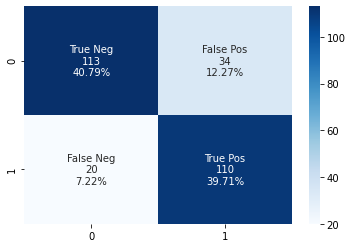

In [14]:
#display confusion matrix
print('The confusion matrix for the Task 1 classifier is:')
display_matrix(cf_matrix)

In [15]:
# #TASK 2
# #Improving the solution of task 1, for this im going to follow an approach of using both unigrams and bigrams.
# In Task 1, the solution only used unigrams in the text classification. This method involved only looking at 
# each word individually instead of multiple words at once. For task 2, instead of using unigrams 
# (which only looks at the individual word), I will be using bigrams as well as unigrams. 
# Unigrams has one major issue in sentiment analysis. For example, in the case 'I do not love chocolates',
# a classifier trained on unigrams would state that this sentence would have a positive sentiment
# due to the word 'love' being so strong in sentiment. It ignores the 'not' as it is only looking at 
# the words on an individual basis. However, on a classifier that was trained using bigrams would state 
# that this sentence has a negative sentiment. This is due to it also looking at the words in the sentence 
# in pairs as well as individually. It would see 'not love' and understand that this is a negative response
# because of the negation word ('not') appearing before a positive word ('love').

# For my case, it would be the issue of reviews that might have had a negation word before a positive word
# would have been classified incorrectly as positive instead of negative and vice versa. Using bigrams 
# along with unigrams would prevent this issue and the expected result would be an increase in the
# accuracy of the classifier and a reduction in the number False Negatives and False Positives in the 
# confusion matrix.

# References: 
# [1] Bekkerman, R., Allan, J.: Using bigrams in text categorization. Technical report, University of Massachusetts (2003) www.cs.umass.edu/~ronb/papers/bigrams.pdf
# [2] Caropreso, M.F., Matwin, S., Sebastiani, F.: A learner-independent evaluation of the usefulness of statistical phrases for automated text categorization. In: Text databases & document management: theory & practice. (2001) 78–102

In [16]:
#in order to implement bigrams, the only change needed is to define the ngram_range parameter in CountVectorizer
#when it hasn't been specified, the default value is ngram_range = (1,1) which states to only
#look at each word (i have anyway specified it above just to make it more clear) individually
#to use bigrams as well as unigrams, we can specify the ngram_range = (1,2) states that unigrams (1-gram)
# as well as bigrams (2-gram) will be used and the rest of the code is the same as task 1
cv2 = CountVectorizer(ngram_range=(1,2))

X2 = cv2.fit_transform(data).toarray()
Y2 = dataset.iloc[:, 0]

#create another set of training and test data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 3)

#using Multinomial Naive Bayes classifier on training data
classifier2 = MultinomialNB()
classifier2.fit(X2_train, Y2_train)

#predict new sentiment for test data
Y2_pred = classifier2.predict(X2_test)

#get new confusion matrix and accuracy for prediction
cf_matrix2 = confusion_matrix(Y2_test, Y2_pred)
test_accuracy2 = accuracy_score(Y2_test, Y2_pred)

#showing the result of the classifier being used on the training data.
training_accuracy2 = classifier2.score(X2_train, Y2_train)
print('Accuracy for the Task 2 classifier on the training data is: %.2f%% \n' % (training_accuracy2 * 100.0))
print('Accuracy for the Task 2 classifier on the test data is: %.2f%% \n' % (test_accuracy2 * 100.0))


Accuracy for the Task 2 classifier on the training data is: 100.00% 

Accuracy for the Task 2 classifier on the test data is: 81.95% 



The confusion matrix for the Task 2 classifier is:


<AxesSubplot:>

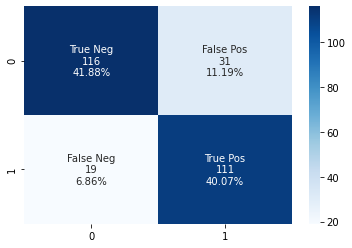

In [17]:
#display confusion matrix
print('The confusion matrix for the Task 2 classifier is:')
display_matrix(cf_matrix2)

In [18]:
# Comparison of Task 2 Against Task 1:

# The solution implemented in task 2 is an improvement than the solution in task 1. 
# This is seen by an increase in the accuracy of the classifier going up by roughly 1.4%. (Firstly, it can be 
# seen that the second classifier has managed to predict all of the sentiments correctly of the training 
# reviews)

# When comparing the confusion matrices against each other, the expected improvements can be seen,
# from the number of False Positives (decreased by 3) and False negatives (decreased by 1) going down 
# (and as a result the number of True Negatives and True Positives going up). The reason this improvement
# can be seen was most likely due to the issue that was stated earlier not occuring (where a positive word 
# could have a negative word in front changing the meaning). A couple of the reviews that were flagged as 
# positive or negative could've had this sort of language structure in them and hence they were able to be 
# accurately identified with the improved solution.

